In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:

# Charger les données
data_file_path = 'dermatology.data'
names_file_path = 'dermatology.names'

# Lire le fichier .names pour comprendre les colonnes
with open(names_file_path, 'r') as file:
    names_info = file.readlines()

# Affichage les lignes du fichier .names pour analyse
names_info


['1. Title: Dermatology Database\n',
 '\n',
 '2. Source Information:\n',
 '   (a) Original owners:\n',
 '       -- 1. Nilsel Ilter, M.D., Ph.D., \n',
 '             Gazi University, \n',
 '             School of Medicine\n',
 '             06510 Ankara, Turkey\n',
 '             Phone: +90 (312) 214 1080\n',
 '\n',
 '       -- 2. H. Altay Guvenir, PhD., \n',
 '             Bilkent University,\n',
 '             Department of Computer Engineering and Information Science,\n',
 '             06533 Ankara, Turkey\n',
 '             Phone: +90 (312) 266 4133\n',
 '             Email: guvenir@cs.bilkent.edu.tr\n',
 '\n',
 '   (b) Donor: H. Altay Guvenir,\n',
 '              Bilkent University,\n',
 '              Department of Computer Engineering and Information Science,\n',
 '              06533 Ankara, Turkey\n',
 '              Phone: +90 (312) 266 4133\n',
 '              Email: guvenir@cs.bilkent.edu.tr\n',
 '\n',
 '   (c) Date:  January, 1998\n',
 '\n',
 '3. Past Usage:\n',
 '   1. G.

In [53]:
# Charger les données du fichier .data pour visualisation
data = pd.read_csv(data_file_path, header=None)

# Afficher les 5 premières lignes pour comprendre la structure
data.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [35]:

# Charger les noms des colonnes depuis le fichier .names
column_names = []
temp=0
with open(names_file_path, 'r') as file:
    for line in file:
        temp += 1
        #print(f"{temp}:")
        # Construire la chaîne à rechercher avec temp converti en chaîne
        search_string = str(temp) + ":"
        if ":" in line:  # Détecter les lignes contenant "index: nom_attribut"
            attribute = line.split(":")[1].strip()  # Extraire le nom après ":"
            column_names.append(attribute)

index_1 = column_names.index("erythema")
index_2 = column_names.index("band-like infiltrate")

# Extraire la portion de la liste entre "Rose" et "Adam" inclusivement
column_names = column_names[index_1:index_2 + 1]            
column_names.remove('(take values 0, 1, 2, 3)')
column_names.remove('Age (linear)')
column_names.append('Age')
column_names.append('class')
column_names[10] = 'family history'
# Vérification des noms détectés
print(f"Noms des colonnes détectés ({len(column_names)}):\n", column_names)


Noms des colonnes détectés (35):
 ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'Age', 'class']


In [36]:

# Vérifier la correspondance du nombre de colonnes
if len(column_names) == data.shape[1]:
    data.columns = column_names
    print("Les colonnes ont été renommées avec succès.")
else:
    print(f"Le nombre de colonnes dans les données ({data.shape[1]}) "
          f"ne correspond pas au nombre de noms extraits ({len(column_names)}).")

# Supression colonne age
data = data.drop('Age', axis=1)
# Sauvegarder le fichier nettoyé
data.to_csv("dermatology_cleaned.csv", index=False)
print("Données nettoyées et sauvegardées dans 'dermatology_cleaned.csv'.")

Les colonnes ont été renommées avec succès.
Données nettoyées et sauvegardées dans 'dermatology_cleaned.csv'.


In [78]:
data = pd.read_csv('dermatology_cleaned.csv')

data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3


In [11]:
# Statistiques descriptives 
data.describe().T


,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral mucosal involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee and elbow involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [12]:
# Afficher les premières lignes pour identifier les colonnes pertinentes
data.head()


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3


In [13]:
data.columns


Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'class'],
      dtype='object')

In [90]:
# Séparer les données en attributs cliniques, histopathologiques et cible
clinical_features = data.iloc[:, 0:11]
clinical_features['class'] = data.iloc[:,34:34]
clinical_features.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history
0,2,2,0,3,0,0,0,0,1,0,0
1,3,3,3,2,1,0,0,0,1,1,1
2,2,1,2,3,1,3,0,3,0,0,0
3,2,2,2,0,0,0,0,0,3,2,0
4,2,3,2,2,2,2,0,2,0,0,0


In [38]:
histopathological_features = data.iloc[:, 11:33]
histopathological_features.head()

,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
0,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
1,0,0,1,0,1,2,0,2,2,2,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,2,0,2,0,0,...,0,2,0,2,3,2,0,0,2,3
3,0,0,3,0,0,2,0,3,2,2,...,0,0,3,0,0,0,0,0,3,0
4,1,0,0,0,1,2,0,0,0,0,...,0,2,2,3,2,3,0,0,2,3


In [39]:

all_features = pd.concat([clinical_features, histopathological_features], axis=1)
all_features.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,0,3,0,0,0,1,0
1,3,3,3,2,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,0,2,3,2,0,0,2,3
3,2,2,2,0,0,0,0,0,3,2,...,0,0,3,0,0,0,0,0,3,0
4,2,3,2,2,2,2,0,2,0,0,...,0,2,2,3,2,3,0,0,2,3


### 1. Distribution des attributs cliniques et histopathologiques
- Examiner les distributions des variables pour identifier leurs caractéristiques principales (asymétrie, concentration des valeurs, etc.).
- Comparer ces distributions entre les différentes classes de maladies (`class`).

### 2. Corrélations entre les attributs
- Calculer les corrélations (matrice de corrélation) pour les variables cliniques et histopathologiques.
- Identifier les relations significatives (corrélations fortes positives ou négatives).

### 3. Associations avec la variable cible (`class`)
- Comparer les moyennes ou les fréquences des variables selon les classes.
- Visualiser ces associations à l'aide de graphiques (ex. boxplots ou heatmaps).


In [40]:
# Corrélations des attributs cliniques entre eux
clinical_corr = clinical_features.corr()
clinical_corr

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491
definite borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615
koebner phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247
polygonal papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841
follicular papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866
oral mucosal involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825
knee and elbow involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915
scalp involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728


In [41]:

# Corrélations des attributs histopathologiques entre eux
histopath_corr = histopathological_features.corr()
histopath_corr

,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
melanin incontinence,1.000000,0.041129,-0.312386,-0.168862,0.391889,0.130277,-0.179071,-0.026993,-0.292861,-0.397832,...,-0.222975,0.896533,-0.137452,0.941659,0.058176,0.900232,-0.093466,-0.109458,0.259467,0.916848
eosinophils in the infiltrate,0.041129,1.000000,0.090818,-0.055676,0.205958,0.039494,-0.060577,-0.056344,-0.181691,-0.146453,...,-0.118513,0.062149,-0.166838,0.039921,0.155231,0.040898,-0.078212,-0.079672,-0.047391,0.028354
PNL infiltrate,-0.312386,0.090818,1.000000,-0.264694,-0.276134,-0.034219,0.029002,0.249271,0.385349,0.227344,...,0.235811,-0.307292,0.167440,-0.317573,-0.126969,-0.315693,-0.117591,-0.109655,-0.084324,-0.318776
fibrosis of the papillary dermis,-0.168862,-0.055676,-0.264694,1.000000,-0.175536,0.168461,0.093905,-0.236672,-0.214724,0.298454,...,-0.163571,-0.167838,-0.197275,-0.168569,-0.182669,-0.160735,-0.083917,-0.092747,-0.024470,-0.171967
exocytosis,0.391889,0.205958,-0.276134,-0.175536,1.000000,-0.177905,-0.193932,-0.349027,-0.625864,-0.708445,...,-0.512835,0.385172,-0.374887,0.380342,0.571287,0.383950,0.065998,0.058414,0.143742,0.381608
acanthosis,0.130277,0.039494,-0.034219,0.168461,-0.177905,1.000000,0.012378,0.178663,0.173271,0.323812,...,0.049673,0.119035,0.090835,0.130071,-0.070574,0.097693,-0.028502,-0.079968,0.131637,0.086486
hyperkeratosis,-0.179071,-0.060577,0.029002,0.093905,-0.193932,0.012378,1.000000,0.162103,0.235782,0.213545,...,0.247044,-0.165868,0.009854,-0.163193,-0.253060,-0.138476,0.096097,0.087759,-0.115426,-0.144124
parakeratosis,-0.026993,-0.056344,0.249271,-0.236672,-0.349027,0.178663,0.162103,1.000000,0.535745,0.403035,...,0.355610,-0.030600,0.289181,-0.032415,-0.230053,-0.037768,0.006593,0.011218,-0.007438,-0.066938
clubbing of the rete ridges,-0.292861,-0.181691,0.385349,-0.214724,-0.625864,0.173271,0.235782,0.535745,1.000000,0.724951,...,0.674602,-0.291793,0.590871,-0.295592,-0.506274,-0.299260,-0.127939,-0.132002,0.009043,-0.301875
elongation of the rete ridges,-0.397832,-0.146453,0.227344,0.298454,-0.708445,0.323812,0.213545,0.403035,0.724951,1.000000,...,0.490559,-0.396382,0.396297,-0.403981,-0.584347,-0.406526,-0.176317,-0.186463,0.018176,-0.416394


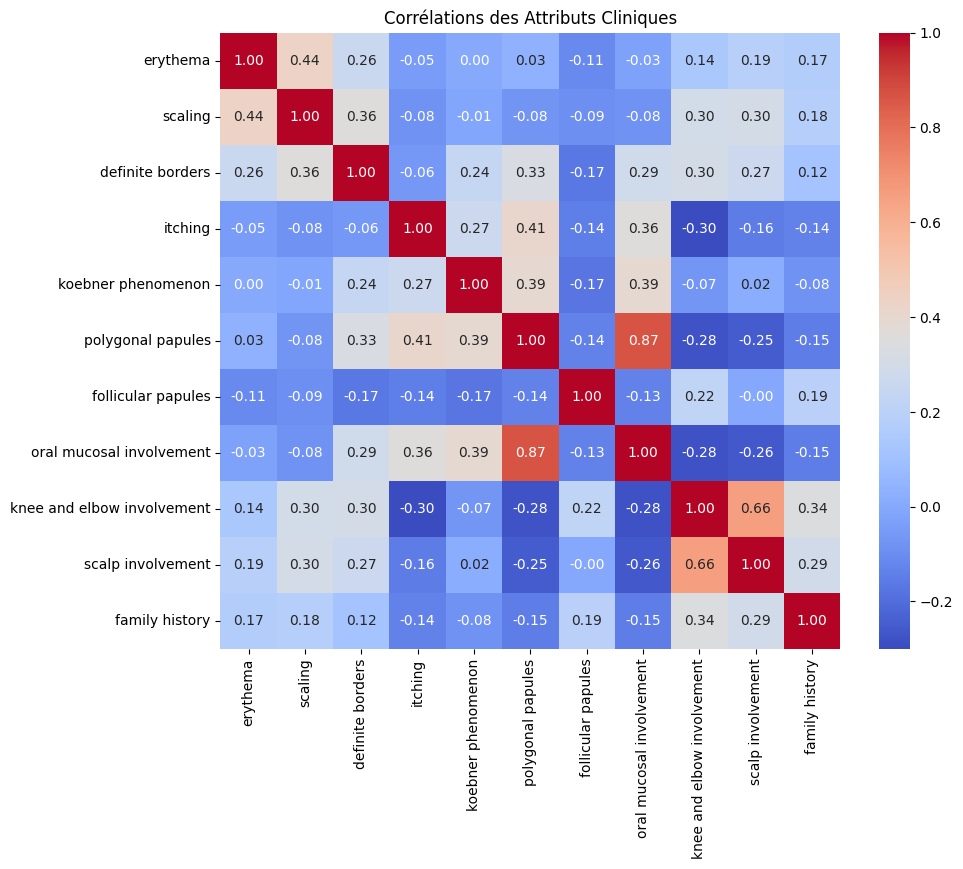

In [42]:

# Calcul des corrélations cliniques
clinical_corr = clinical_features.corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(clinical_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélations des Attributs Cliniques")
plt.show()


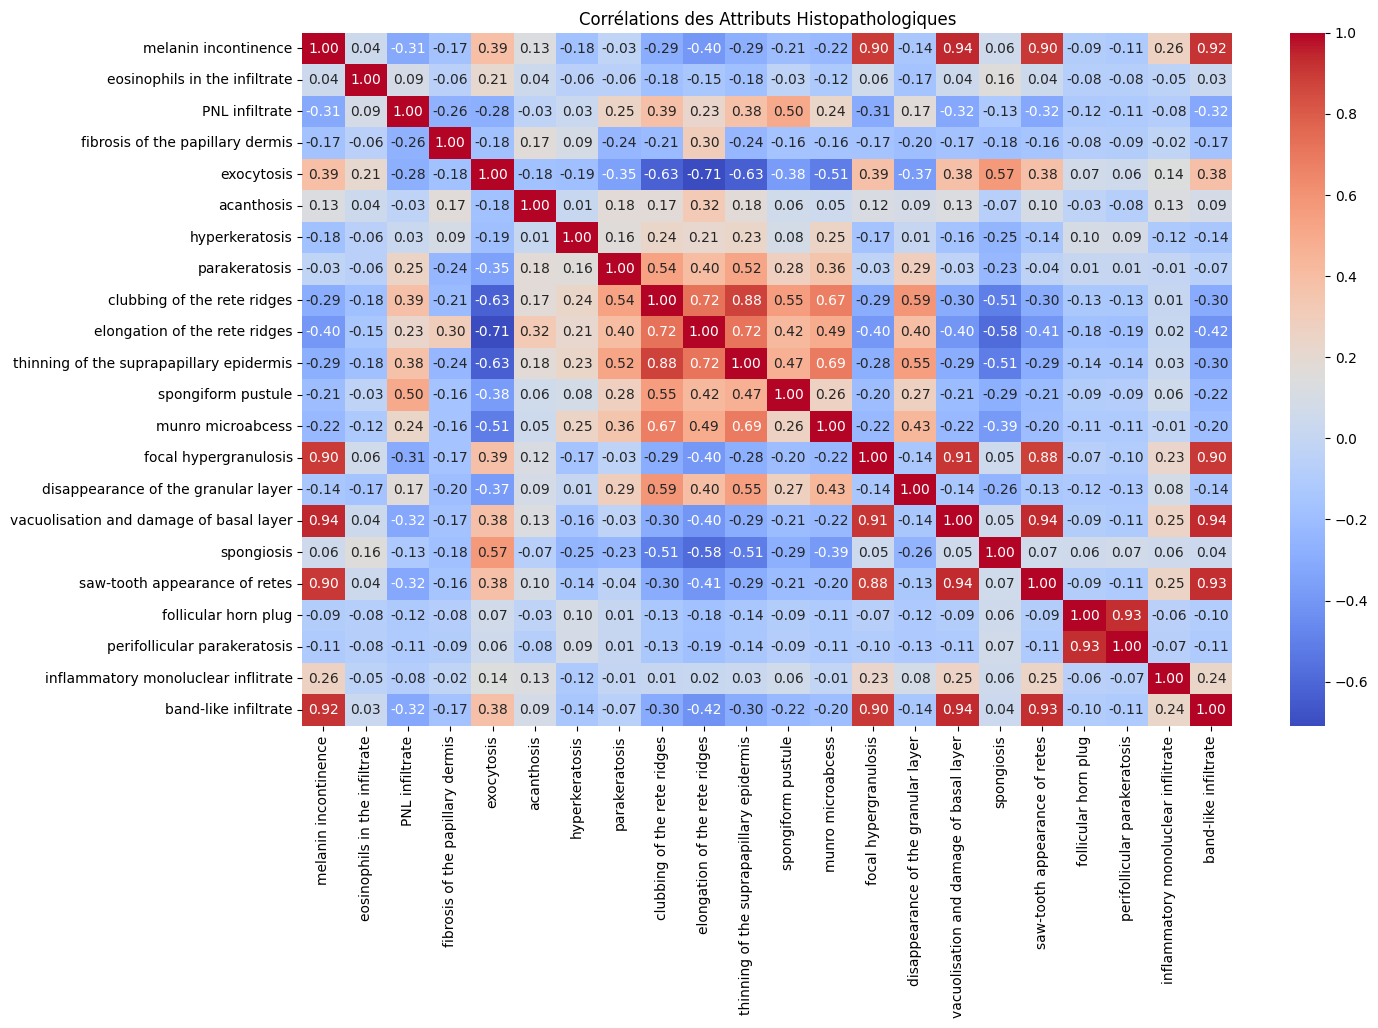

In [43]:
# Calcul des corrélations histopathologiques
histopath_corr = histopathological_features.corr()

# Visualisation
plt.figure(figsize=(15, 9))
sns.heatmap(histopath_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélations des Attributs Histopathologiques")
plt.show()


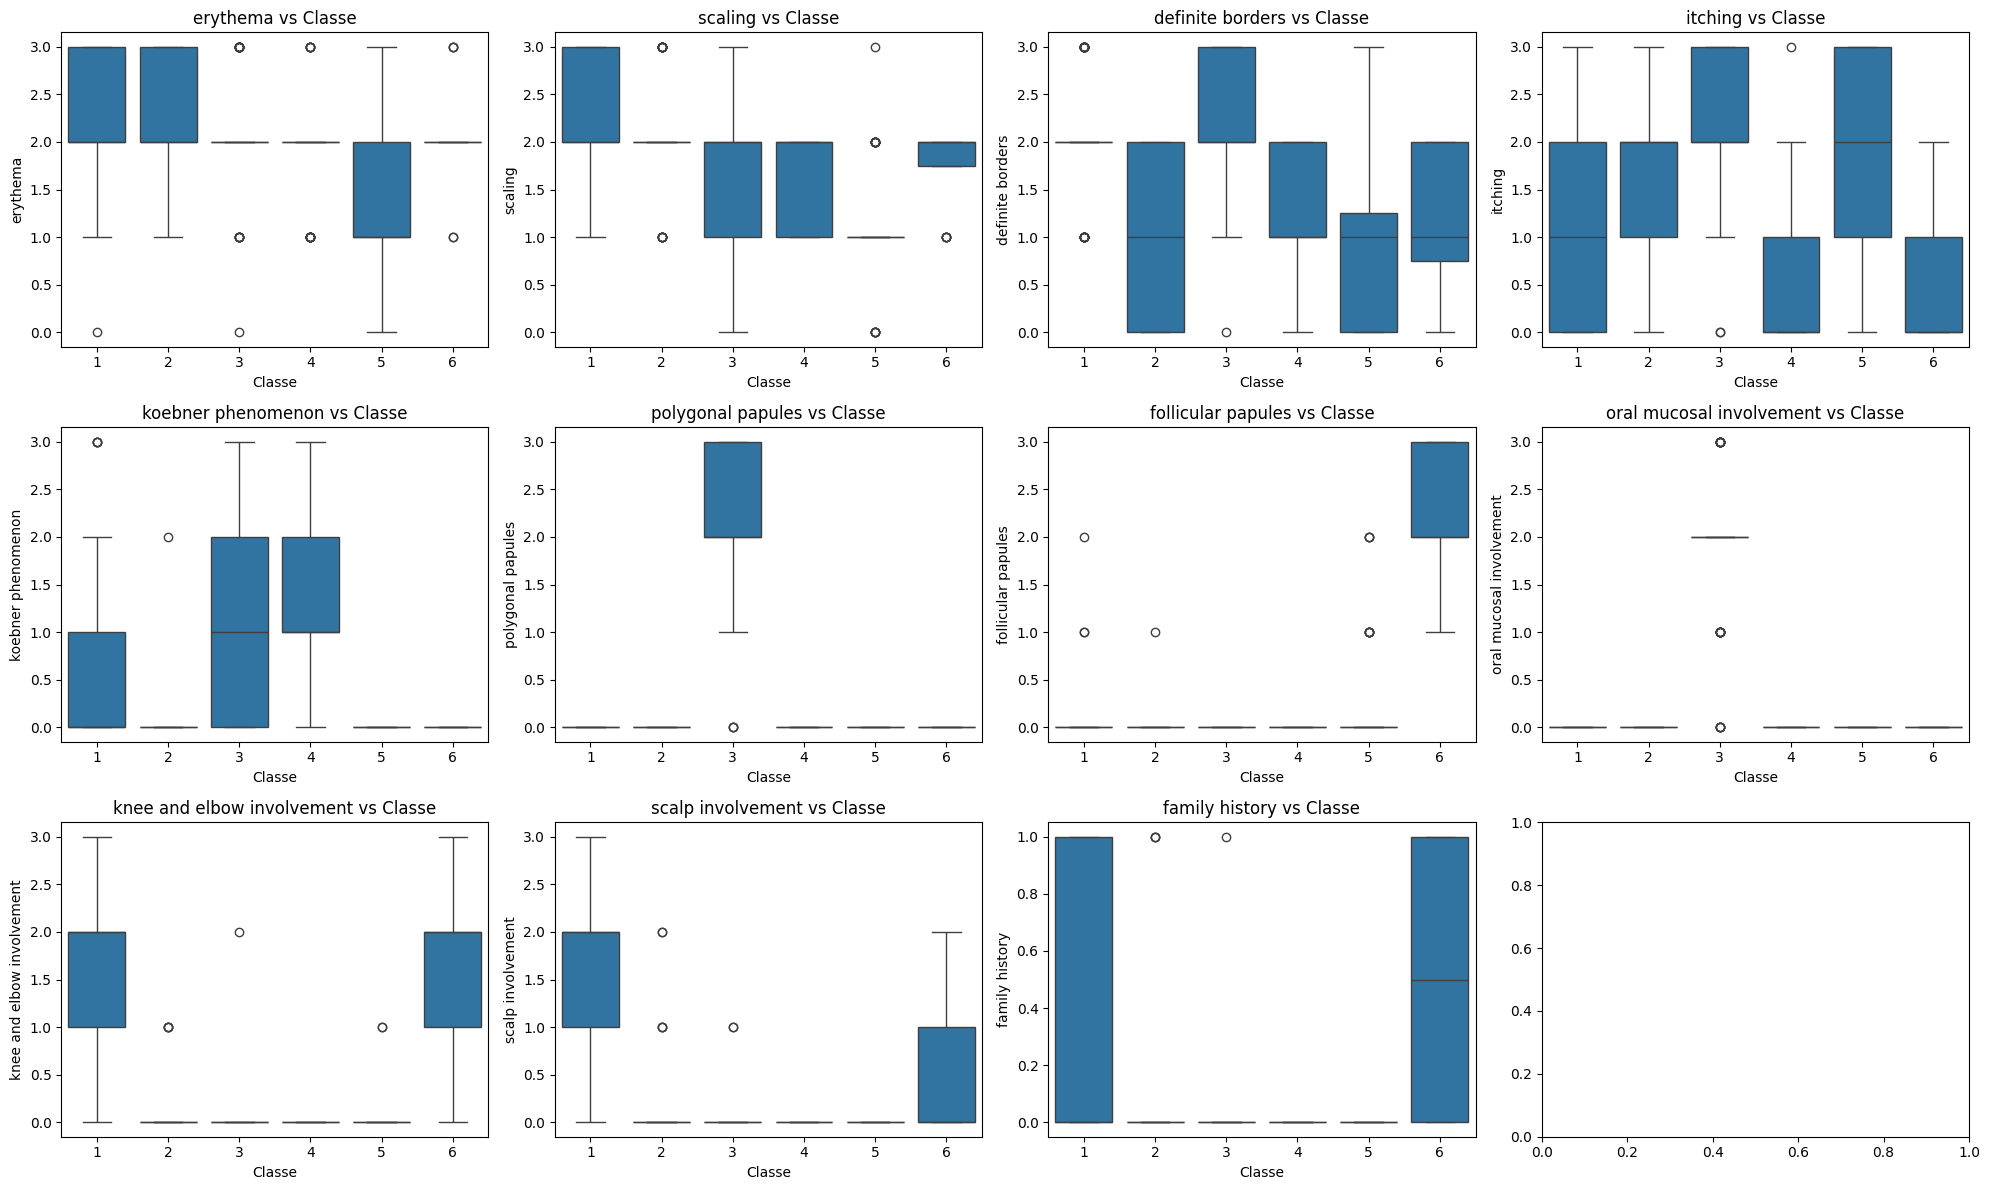

In [21]:
# Boxplot pour étudier les relations entre les attributs cliniques et la classe
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(clinical_features.columns):
    sns.set_palette("Set3")
    sns.boxplot(data=data, x='class', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Classe")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


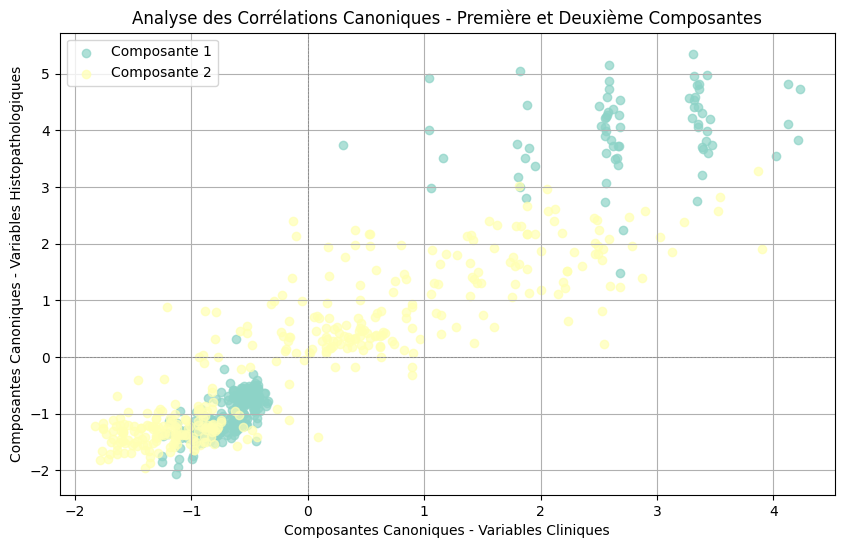

0.23553048622600298

In [24]:
from sklearn.cross_decomposition import CCA

# Définir le nombre de composantes (minimum du nombre de variables dans les deux groupes)
n_components = min(clinical_features.shape[1], histopathological_features.shape[1])

# Initialiser le modèle d'Analyse des Corrélations Canoniques (ACC)
cca = CCA(n_components=n_components)

# Ajuster le modèle sur les deux ensembles de variables
cca.fit(clinical_features, histopathological_features)

# Transformer les données pour obtenir les composantes canoniques
clinical_canonical, histopath_canonical = cca.transform(clinical_features, histopathological_features)

# Visualisation des résultats - Scatter plot des premières composantes canoniques
plt.figure(figsize=(10, 6))
plt.scatter(clinical_canonical[:, 0], histopath_canonical[:, 0], alpha=0.7, label="Composante 1")
plt.scatter(clinical_canonical[:, 1], histopath_canonical[:, 1], alpha=0.7, label="Composante 2")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.title("Analyse des Corrélations Canoniques - Première et Deuxième Composantes")
plt.xlabel("Composantes Canoniques - Variables Cliniques")
plt.ylabel("Composantes Canoniques - Variables Histopathologiques")
plt.legend()
plt.grid()
plt.show()

# Affichage des corrélations canoniques
canonical_correlations = cca.score(clinical_features, histopathological_features)
canonical_correlations


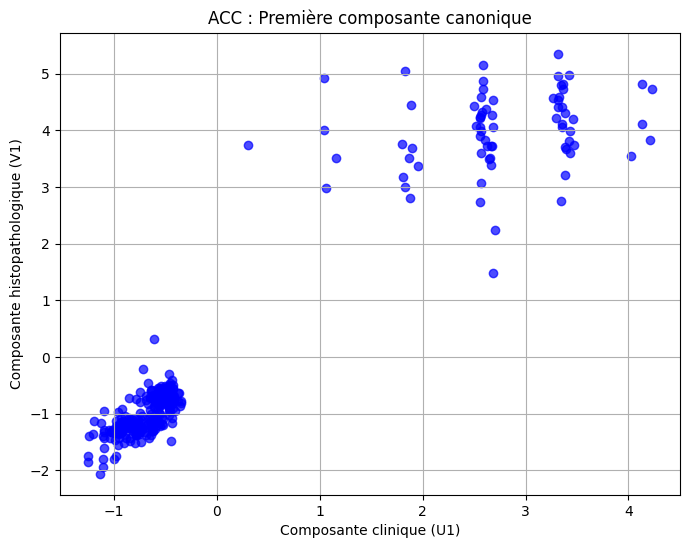

{'Canonical Correlations': array([0.96163965, 0.88519677, 0.8702483 , 0.56906804, 0.41139322,
        0.37534195, 0.28193051, 0.26201245, 0.21076459, 0.19330644,
        0.15279204]),
 'First Canonical Component Weights (Clinical)': array([-0.00143836, -0.05647092, -0.01300239,  0.01285033,  0.01002278,
         0.76375456, -0.08443118,  0.62943412, -0.06442595, -0.06309356,
        -0.04007318]),
 'First Canonical Component Weights (Histopathological)': array([ 0.3805352 , -0.04139301, -0.01318964,  0.13653532, -0.01193984,
        -0.01524183, -0.01638432, -0.01324818, -0.12082076, -0.01709434,
         0.00889894,  0.01393028,  0.04470366,  0.47836067,  0.0428709 ,
         0.32078228,  0.19974352,  0.30534847,  0.0251121 , -0.18259405,
        -0.01185893,  0.56202156])}

In [26]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Séparation des données en attributs cliniques et histopathologiques
clinical_attributes = data.iloc[:, :11]  # Colonnes 1 à 11
histopathological_attributes = data.iloc[:, 11:33]  # Colonnes 12 à la fin

# Normalisation des données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(clinical_features)
Y_normalized = scaler.fit_transform(histopathological_features)

# Application de l'ACC
n_components = min(X_normalized.shape[1], Y_normalized.shape[1])
cca = CCA(n_components=n_components)
cca.fit(X_normalized, Y_normalized)

# Transformation pour obtenir les composantes canoniques
X_canonical, Y_canonical = cca.transform(X_normalized, Y_normalized)

# Calcul des corrélations canoniques
canonical_correlations = np.corrcoef(X_canonical.T, Y_canonical.T)[:n_components, n_components:]

# Afficher les corrélations canoniques
correlations = np.diag(canonical_correlations)

# Visualisation de la première composante canonique
plt.figure(figsize=(8, 6))
plt.scatter(X_canonical[:, 0], Y_canonical[:, 0], alpha=0.7, c='blue')
plt.title("ACC : Première composante canonique")
plt.xlabel("Composante clinique (U1)")
plt.ylabel("Composante histopathologique (V1)")
plt.grid(True)
plt.show()

# Résultats principaux
{
    "Canonical Correlations": correlations,
    "First Canonical Component Weights (Clinical)": cca.x_weights_[:, 0],
    "First Canonical Component Weights (Histopathological)": cca.y_weights_[:, 0]
}


In [27]:
from numpy.linalg import eig, svd

# Calcul de la matrice de covariance conjointe
cov_X = np.cov(X_normalized, rowvar=False)  # Matrice de covariance des attributs cliniques
cov_Y = np.cov(Y_normalized, rowvar=False)  # Matrice de covariance des attributs histopathologiques
cov_XY = np.dot(X_normalized.T, Y_normalized) / (X_normalized.shape[0] - 1)  # Matrice de covariance croisée

# Décomposition en valeurs propres pour les covariances cliniques et histopathologiques
eigenvalues_X, eigenvectors_X = eig(cov_X)
eigenvalues_Y, eigenvectors_Y = eig(cov_Y)

# Décomposition en valeurs singulières pour la matrice de covariance croisée
U, s, Vt = svd(cov_XY)

# Organisation des résultats pour analyse
results = {
    "Covariance Matrix Clinical": cov_X,
    "Covariance Matrix Histopathological": cov_Y,
    "Cross-Covariance Matrix": cov_XY,
    "Eigenvalues Clinical": eigenvalues_X,
    "Eigenvalues Histopathological": eigenvalues_Y,
    "Singular Values (Canonical Correlations)": s
}

results


{'Covariance Matrix Clinical': array([[ 1.00273973e+00,  4.36659803e-01,  2.60799709e-01,
         -4.77532972e-02,  6.96383382e-04,  3.36625716e-02,
         -1.09850576e-01, -2.68838008e-02,  1.41394464e-01,
          1.87195471e-01,  1.72530600e-01],
        [ 4.36659803e-01,  1.00273973e+00,  3.58967950e-01,
         -8.44279785e-02, -1.06052020e-02, -7.52408150e-02,
         -9.26535422e-02, -8.31963802e-02,  2.99215879e-01,
          3.02403693e-01,  1.81988449e-01],
        [ 2.60799709e-01,  3.58967950e-01,  1.00273973e+00,
         -6.27351673e-02,  2.42003124e-01,  3.28651462e-01,
         -1.67118485e-01,  2.87469212e-01,  3.03137365e-01,
          2.69598219e-01,  1.16161148e-01],
        [-4.77532972e-02, -8.44279785e-02, -6.27351673e-02,
          1.00273973e+00,  2.68611828e-01,  4.10817969e-01,
         -1.45221888e-01,  3.60147153e-01, -3.00465496e-01,
         -1.56065197e-01, -1.36989744e-01],
        [ 6.96383382e-04, -1.06052020e-02,  2.42003124e-01,
          2.68

In [28]:
# 1. Matrice de corrélation comme mesure de similarité
similarity_matrix = np.corrcoef(np.hstack([X_normalized, Y_normalized]), rowvar=False)

# 2. Calcul des valeurs propres et pourcentages d'inertie
# Pour une analyse complète, on décompose la matrice conjointe
eigenvalues, eigenvectors = eig(similarity_matrix)

# Tri des valeurs propres par ordre décroissant
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Pourcentages d'inertie
inertia_percentages = (eigenvalues_sorted / sum(eigenvalues_sorted)) * 100

# 3. Corrélations canoniques (déjà obtenues via valeurs singulières de CCA)
canonical_correlations = s

# Organisation des résultats pour analyse
analysis_results = {
    "Similarity Matrix": similarity_matrix,
    "Eigenvalues": eigenvalues_sorted,
    "Inertia Percentages": inertia_percentages,
    "Canonical Correlations": canonical_correlations
}

analysis_results


{'Similarity Matrix': array([[ 1.        ,  0.43546674,  0.26008714, ...,  0.00953901,
          0.0757581 , -0.00695452],
        [ 0.43546674,  1.        ,  0.35798716, ..., -0.01113497,
         -0.01097744, -0.13207915],
        [ 0.26008714,  0.35798716,  1.        , ..., -0.12394733,
          0.11188152,  0.28257806],
        ...,
        [ 0.00953901, -0.01113497, -0.12394733, ...,  1.        ,
         -0.07239514, -0.11301453],
        [ 0.0757581 , -0.01097744,  0.11188152, ..., -0.07239514,
          1.        ,  0.23602193],
        [-0.00695452, -0.13207915,  0.28257806, ..., -0.11301453,
          0.23602193,  1.        ]], shape=(33, 33)),
 'Eigenvalues': array([9.23868731, 5.41491142, 2.95751326, 2.23200048, 1.3399304 ,
        1.20618177, 1.02821571, 0.95298759, 0.85585254, 0.80506667,
        0.77799656, 0.71683253, 0.6708009 , 0.57799736, 0.57152216,
        0.49796334, 0.42324452, 0.37260782, 0.33174032, 0.29228645,
        0.28171747, 0.24917898, 0.22503087, 0.188

## Etudes sur les 11 attributs cliniques la variable class

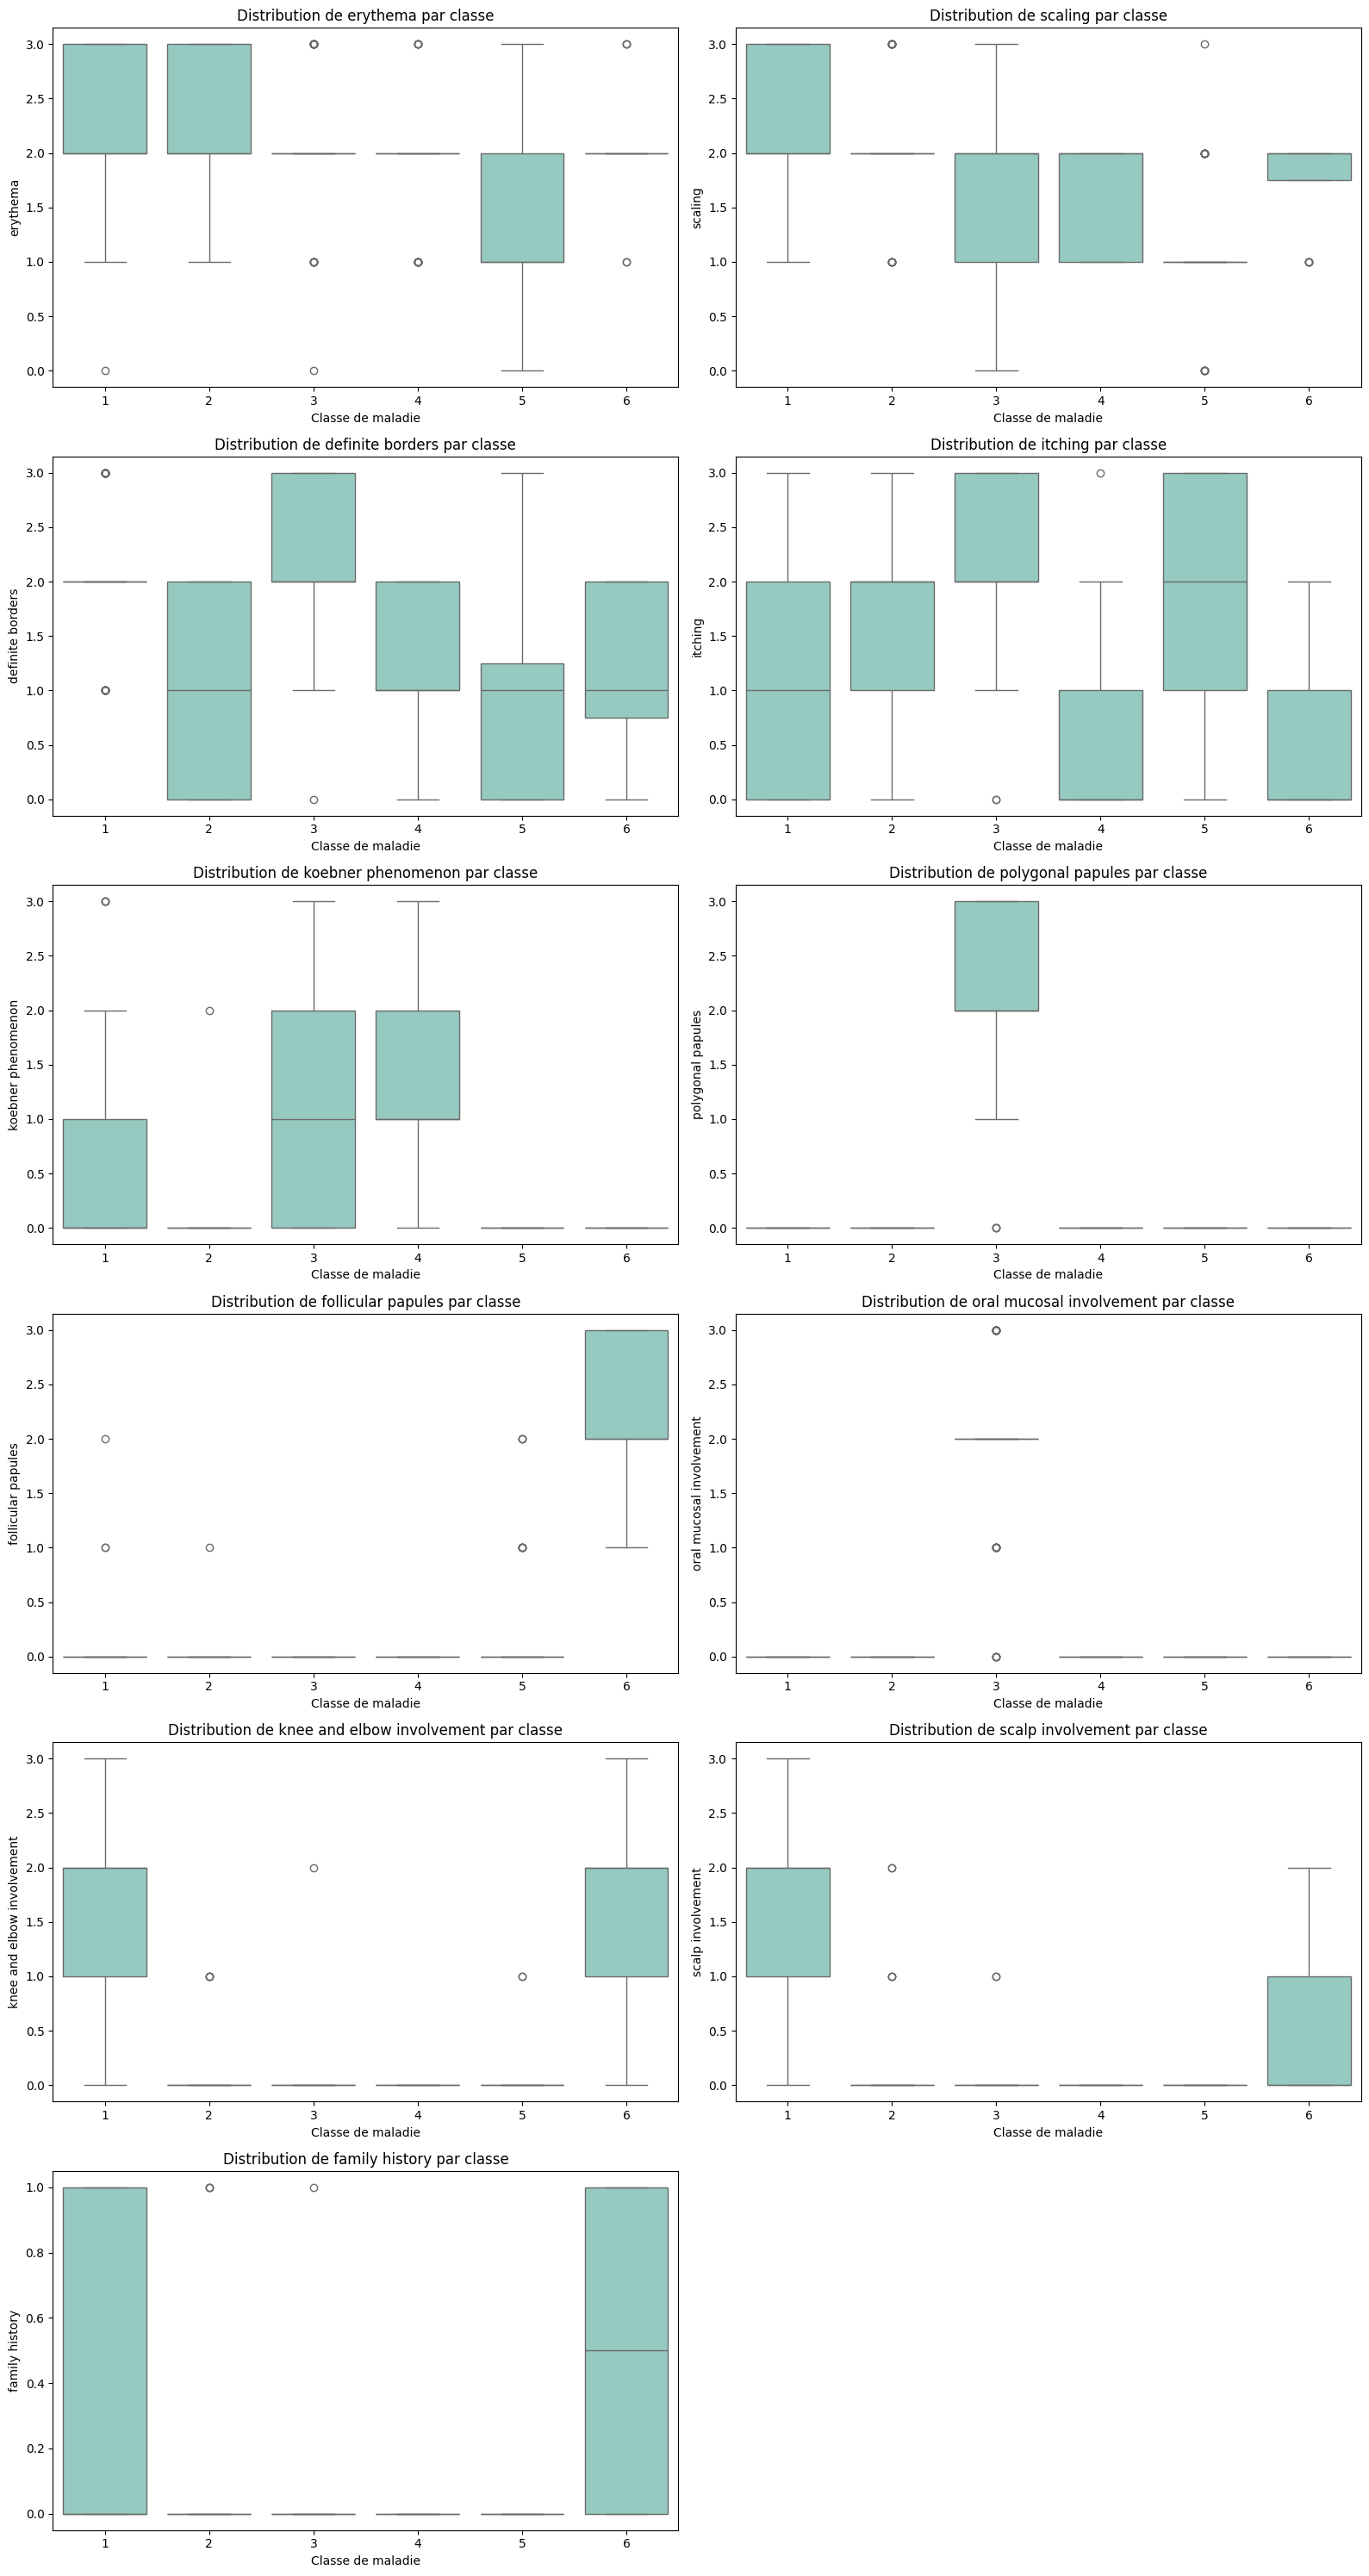

class                                   1         2         3         4  \
erythema                   mean  2.285714  2.278689  2.083333  1.897959   
                           std   0.621370  0.609129  0.599295  0.586121   
                           min   0.000000  1.000000  0.000000  1.000000   
                           max   3.000000  3.000000  3.000000  3.000000   
scaling                    mean  2.196429  2.065574  1.625000  1.510204   
                           std   0.627296  0.543717  0.659439  0.505076   
                           min   1.000000  1.000000  0.000000  1.000000   
                           max   3.000000  3.000000  3.000000  2.000000   
definite borders           mean  2.098214  0.950820  2.097222  1.183673   
                           std   0.584481  0.804699  0.674688  0.726678   
                           min   1.000000  0.000000  0.000000  0.000000   
                           max   3.000000  2.000000  3.000000  2.000000   
itching                    mean  0.946429  1.622951  2.277778  0.469388   
                           std   1.089171  0.951559  0.791188  0.766541   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   3.000000  3.000000  3.000000  3.000000   
koebner phenomenon         mean  0.669643  0.032787  1.347222  1.183673   
                           std   0.873931  0.256074  1.050281  0.808122   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   3.000000  2.000000  3.000000  3.000000   
polygonal papules          mean  0.000000  0.000000  2.277778  0.000000   
                           std   0.000000  0.000000  0.696515  0.000000   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   0.000000  0.000000  3.000000  0.000000   
follicular papules         mean  0.035714  0.016393  0.000000  0.000000   
                           std   0.229711  0.128037  0.000000  0.000000   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   2.000000  1.000000  0.000000  0.000000   
oral mucosal involvement   mean  0.000000  0.000000  1.916667  0.000000   
                           std   0.000000  0.000000  0.764531  0.000000   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   0.000000  0.000000  3.000000  0.000000   
knee and elbow involvement mean  1.633929  0.065574  0.027778  0.000000   
                           std   1.004454  0.249590  0.235702  0.000000   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   3.000000  1.000000  2.000000  0.000000   
scalp involvement          mean  1.526786  0.114754  0.027778  0.000000   
                           std   0.976847  0.412244  0.165489  0.000000   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   3.000000  2.000000  1.000000  0.000000   
family history             mean  0.285714  0.049180  0.013889  0.000000   
                           std   0.453784  0.218039  0.117851  0.000000   
                           min   0.000000  0.000000  0.000000  0.000000   
                           max   1.000000  1.000000  1.000000  0.000000   

class                                   5         6  
erythema                   mean  1.500000  2.050000  
                           std   0.671551  0.510418  
                           min   0.000000  1.000000  
                           max   3.000000  3.000000  
scaling                    mean  1.134615  1.750000  
                           std   0.627127  0.444262  
                           min   0.000000  1.000000  
                           max   3.000000  2.000000  
definite borders           mean  0.846154  1.050000  
                           std   0.894090  0.759155  
                           min

In [49]:


# Calcul des statistiques descriptives par classe
stats_by_class = data.groupby('class')[column_names[0:11]].agg(['mean', 'std', 'min', 'max']).T

# Visualisation avec des boîtes à moustaches
plt.figure(figsize=(16, 30))
for i, attribute in enumerate(column_names[0:11], start=1):
    plt.subplot(6, 2, i)
    sns.set_palette("Set3")
    sns.boxplot(data=data, x='class', y=attribute)
    plt.title(f'Distribution de {attribute} par classe')
    plt.xlabel("Classe de maladie")
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

# Afficher les statistiques descriptives
stats_by_class


In [50]:
import scipy.stats as stats

# Calculer les corrélations entre les attributs cliniques et la classe
correlations = {}
for attribute in column_names[0:11]:
    correlation, p_value = stats.spearmanr(data[attribute], data['class'])
    correlations[attribute] = {"correlation": correlation, "p_value": p_value}

# Résultats des corrélations
correlation_results = pd.DataFrame(correlations).T
correlation_results.columns = ['Spearman Correlation', 'p-value']
print("Corrélations avec la variable classe :")
print(correlation_results)

# Test ANOVA pour chaque attribut clinique
anova_results = {}
for attribute in clinical_attributes:
    f_value, p_value = stats.f_oneway(
        *[data[data['class'] == cls][attribute] for cls in data['class'].unique()]
    )
    anova_results[attribute] = {"F-value": f_value, "p_value": p_value}

# Résultats d'ANOVA
anova_results_df = pd.DataFrame(anova_results).T
anova_results_df.columns = ['F-value', 'p-value']
print("Résultats ANOVA :")
print(anova_results_df)

# Test de Kruskal-Wallis
kruskal_results = {}
for attribute in column_names[0:11]:
    h_value, p_value = stats.kruskal(
        *[data[data['class'] == cls][attribute] for cls in data['class'].unique()]
    )
    kruskal_results[attribute] = {"H-value": h_value, "p_value": p_value}

# Résultats de Kruskal-Wallis
kruskal_results_df = pd.DataFrame(kruskal_results).T
kruskal_results_df.columns = ['H-value', 'p-value']
print("Résultats Kruskal-Wallis :")
print(kruskal_results_df)


Corrélations avec la variable classe :
                            Spearman Correlation       p-value
erythema                               -0.339951  2.366312e-11
scaling                                -0.480739  1.454140e-22
definite borders                       -0.400754  1.493490e-15
itching                                 0.091965  7.890108e-02
koebner phenomenon                     -0.072574  1.658983e-01
polygonal papules                       0.120817  2.078165e-02
follicular papules                      0.399627  1.820957e-15
oral mucosal involvement                0.118728  2.310602e-02
knee and elbow involvement             -0.465695  4.230597e-21
scalp involvement                      -0.616751  9.899259e-40
family history                         -0.194077  1.871310e-04
Résultats ANOVA :
                               F-value        p-value
erythema                     13.984859   1.670781e-12
scaling                      28.771801   1.496312e-24
definite borders         

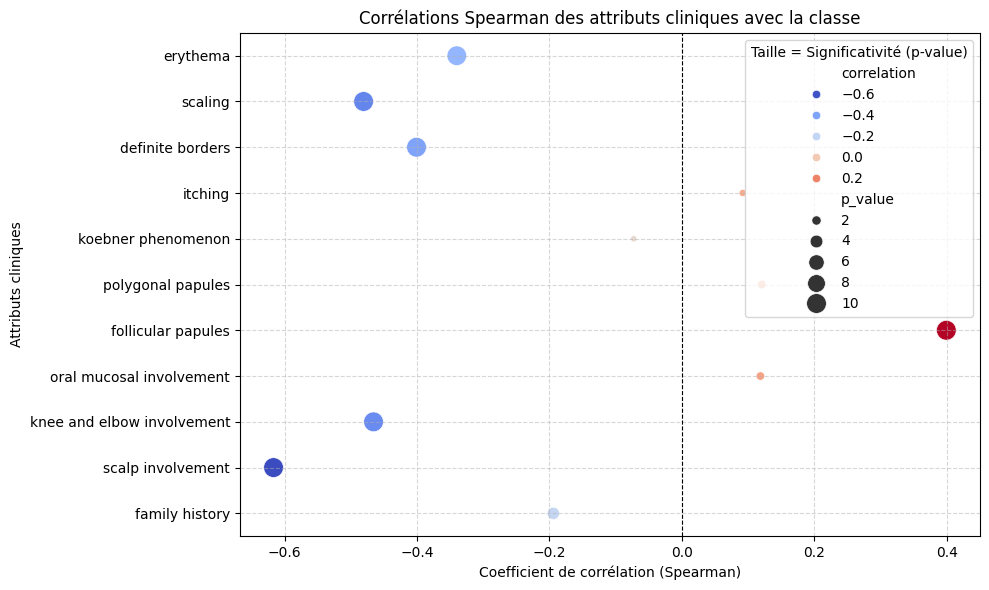

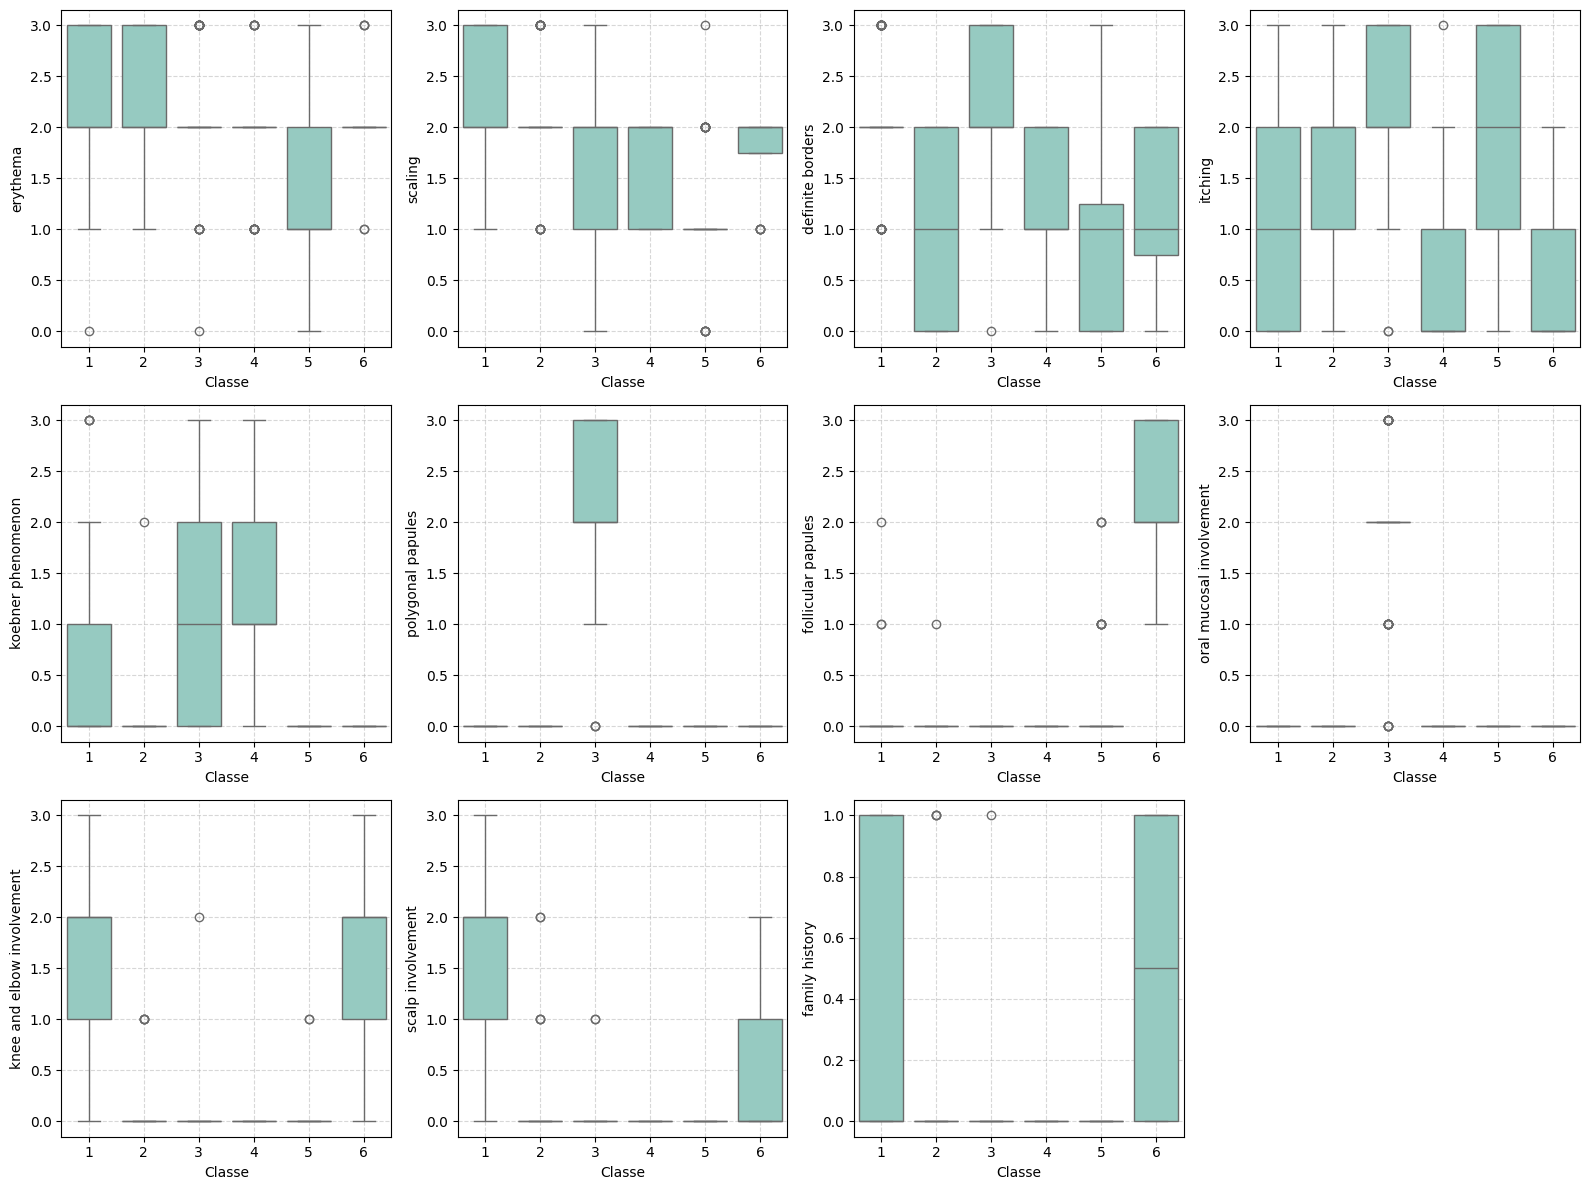

In [51]:


# Préparation pour les résultats de corrélation
correlations = {}
for attribute in column_names[0:11]:
    correlation, p_value = stats.spearmanr(data[attribute], data['class'])
    correlations[attribute] = {"correlation": correlation, "p_value": p_value}

correlation_results = pd.DataFrame(correlations).T

# Visualisation des corrélations (diagramme de points)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=correlation_results["correlation"], 
    y=correlation_results.index, 
    size=-np.log10(correlation_results["p_value"] + 1e-10), 
    sizes=(20, 200),
    hue=correlation_results["correlation"], 
    palette="coolwarm"
)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Corrélations Spearman des attributs cliniques avec la classe")
plt.xlabel("Coefficient de corrélation (Spearman)")
plt.ylabel("Attributs cliniques")
plt.legend(title="Taille = Significativité (p-value)", loc='upper right')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Visualisation des distributions avec des boxplots (par classe)
n_cols = 4
n_rows = (len(column_names[0:11]) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharey=False)
axes = axes.flatten()

for i, attribute in enumerate(column_names[0:11]):
    
    sns.set_palette("Set3")
    sns.boxplot(data=data, x='class', y=attribute, ax=axes[i])
    axes[i].set_ylabel(attribute)
    axes[i].set_xlabel("Classe")
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)

# Masquer les sous-graphiques inutilisés
for j in range(len(column_names[0:11]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


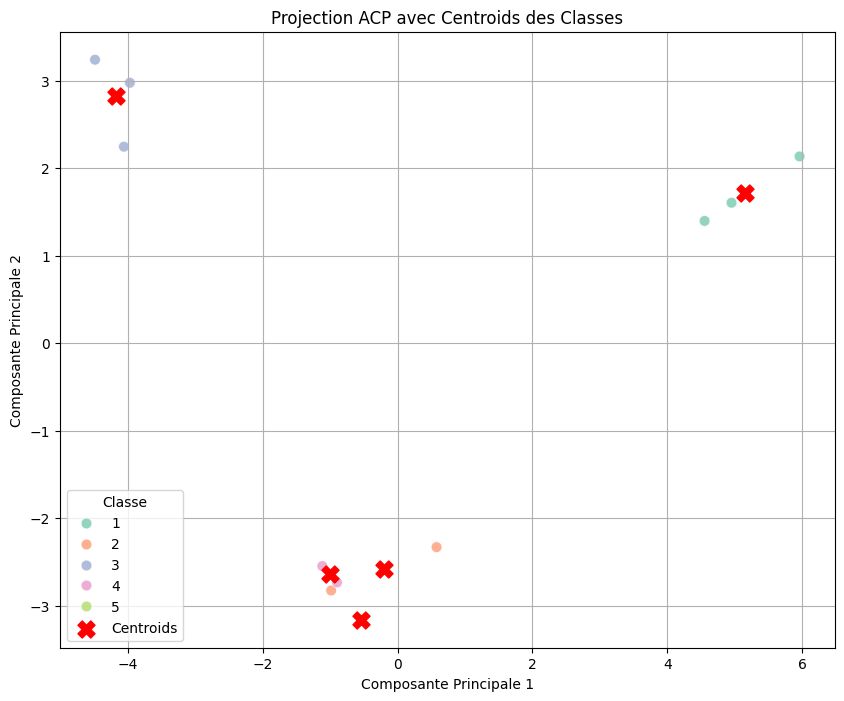

Variance expliquée par la PCA1: 40.09%
Variance expliquée par la PCA2: 20.77%
<bound method Series.count of 0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64>


In [71]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


X = data[0:11]
y = data['class']

# Standardisation des données cliniques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Création d'un DataFrame pour les composantes principales
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['class'] = y

# Calcul des centroids des classes
centroids = pca_df.groupby('class')[['PCA1', 'PCA2']].mean()

# Visualisation des données projetées
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='class', palette='Set2', s=60, alpha=0.7)
plt.scatter(centroids['PCA1'], centroids['PCA2'], c='red', s=150, marker='X', label='Centroids')
plt.title('Projection ACP avec Centroids des Classes')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Classe')
plt.grid(True)
plt.show()

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par la PCA1: {explained_variance[0]:.2%}")
print(f"Variance expliquée par la PCA2: {explained_variance[1]:.2%}")


In [79]:
data['class'].value_counts()


class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64